# M2P07 Regression Project
--------

**The objective of the M2P07 Regression Project is to explore multiple regression models, in order to find a model that predicts the rental price most accurately.**

**The material applied from Module 2 will be the following:**
1. Feature Engineering and Data Preprocessing
2. Linear Regression
3. Polynomial Regression
4. Regularization

**M2P07 Regression Project has the following conditions:**
1. Project must include EDA section.
2. Project must include visualization.
3. Data must be cleaned and prepared.
4. Use Feature Engineering, if applicable.
5. Must compare at minimum 3 regression models.
6. Explain which feature(s) are chosen for final model.
7. Use final model to make new predictions based on my provided input.

**The outline for the project will be the following:**

**The project will be split into five parts:**
1. Part 1 will involve EDA, Visualization, Data Cleaning, Encoding, Data Preparation (ex: Split to X and y).  <br>
2. Part 2 will be working with Model #1: Simple Linear Regression. <br>
3. Part 3 will be working with Model #2: Polynomial Regression. <br>
4. Part 4 will be working with Model #3: Polynomial Regression, with RidgeCV L2 Regularization. <br>
5. Part 5 will be determining which of the three models has the best performance and having the best performing model be our final model. <br>
   The final model will be used to make a prediction and includes some final comments/conclusion. <br>


#### Part 1: EDA, Visualization, Data Cleaning, Encoding, Data Preparation (ex: Split to X and y) 

In [688]:
#1.1 Import 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [689]:
#1.2 Load data

rent_df = pd.read_csv("../M2P07-Regression_Project-main/canada_rent.csv")
rent_df

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25766,334285,Yorkton,Saskatchewan,18 Allanbrooke Dr,51.203024,-102.484782,Long Term,Apartment,920.0,Studio,1,400,/sk/yorkton/rentals/apartment/3-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
25767,334285,Yorkton,Saskatchewan,18 Allanbrooke Dr,51.203024,-102.484782,Long Term,Apartment,1450.0,3 Beds,1,810,/sk/yorkton/rentals/apartment/3-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
25768,334284,Yorkton,Saskatchewan,363 Northview Rd,51.202667,-102.485765,Long Term,Apartment,1125.0,1 Bed,1,520,/sk/yorkton/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,Non-Smoking,True,True
25769,334284,Yorkton,Saskatchewan,363 Northview Rd,51.202667,-102.485765,Long Term,Apartment,920.0,Studio,1,400,/sk/yorkton/rentals/apartment/1-bedroom/pet-fr...,Unfurnished,Immediate,Non-Smoking,True,True


In [690]:
# 1.3 EDA and Visualization

# 1.3.1 EDA here

# Note: I commented out (added #) for some lines of code so it won't take space in the output. 
# If you want to see the output, remove the # before "print" in each line.

# Data exploration:

# View first 5 rows of df.
#print(rent_df.head())

# View last 5 rows of df.
#print(rent_df.tail())

# View descriptive statistics of the numerical columns.
#print(rent_df.describe())


# View a summary of the dataset including data types, number of non-null entries and memory usage. 
print(rent_df.info())

# View missing values in the dataset.
print(rent_df.isnull().sum())

# View data types of each column.
print(rent_df.dtypes)


# View the unique values in a column
#print(rent_df['price'].unique())

# View the count of unique values in each column
#print(rent_df.nunique())

# Comments:
# Features which should be kept:
# Numerical features: 
# - latitude and longitude, beds (convert object to numerical), baths: (convert object to numerical), 
# - sq_feet: convert object to numerical)

# Categorical Features which should be kept: (Convert to Numerical) 
# - lease_term, type, furnishing, availability_date, smoking, cats and dogs 

# Features which should be removed:
# - address, rentfaster_id and link


# sq_feet is missing a lot of values, numerical: replace with mean?
# 'price' will be target variable, this must be kept. 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

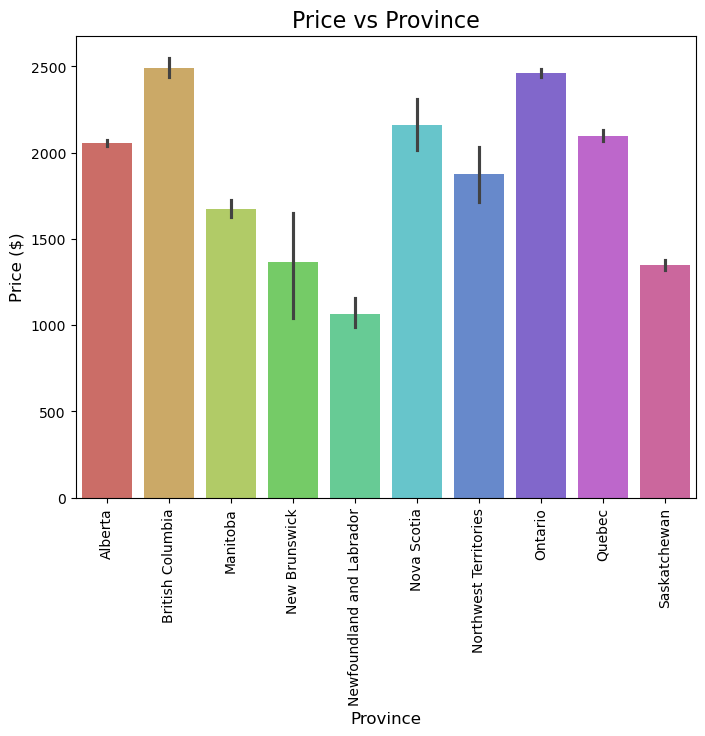

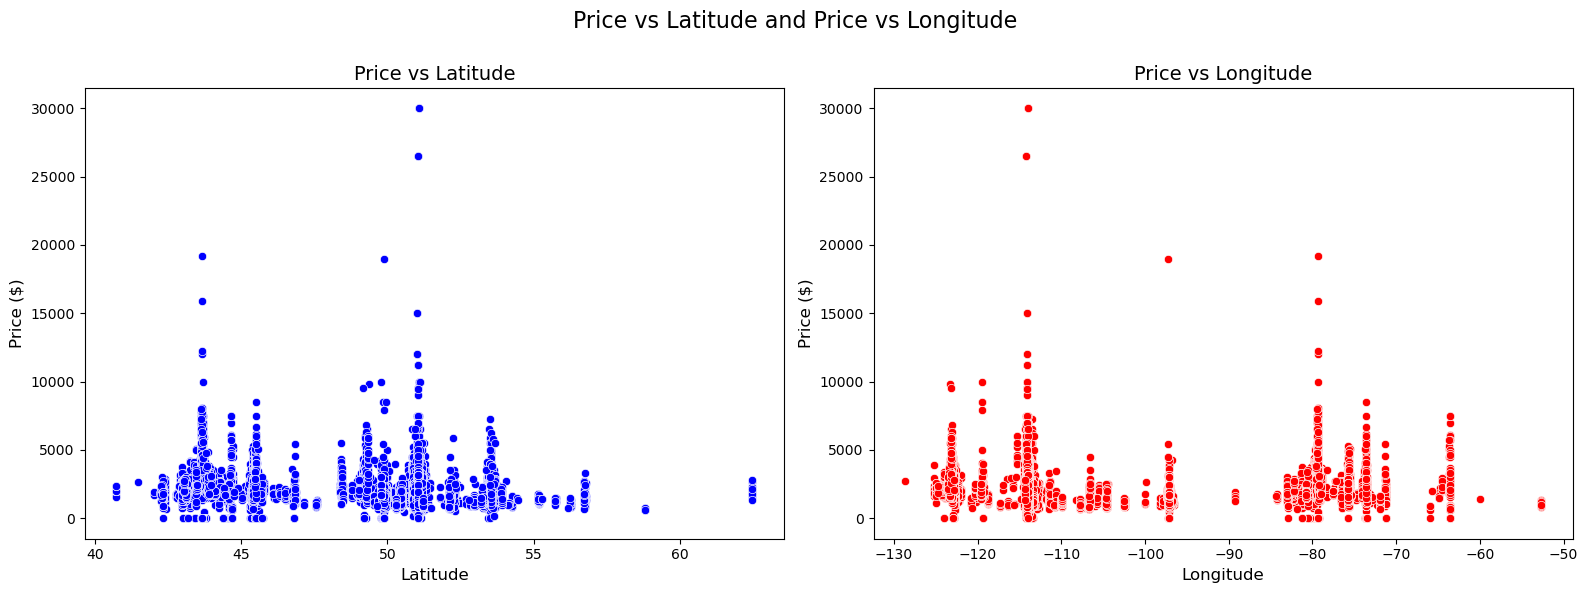

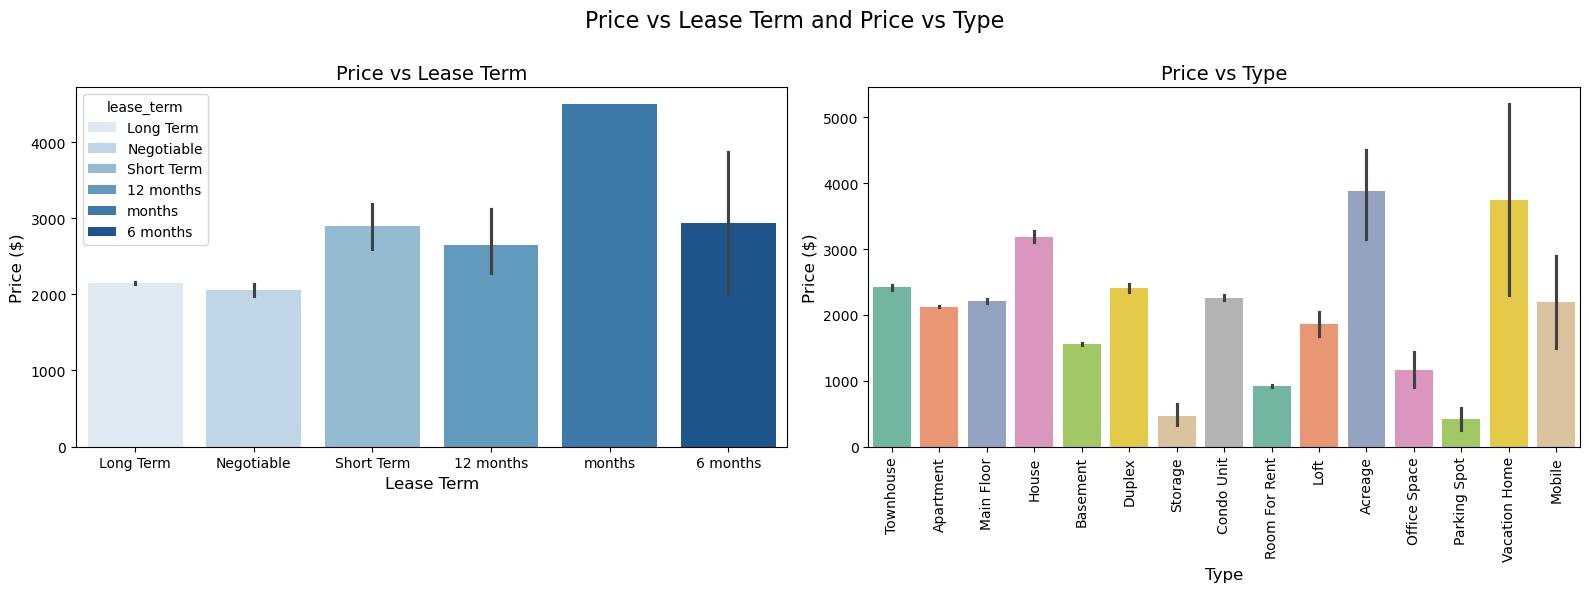

In [691]:
# 1.3.2 Visualization

import seaborn as sns
import matplotlib.pyplot as plt

#------------------------ Bar plot of Price vs Province-----------------------------------------------------------------------------

# Plotting the bar plot.
plt.figure(figsize=(8, 6))
sns.barplot(data=rent_df, x='province', y='price', hue='province', palette='hls')

# Adding labels and title
plt.title('Price vs Province', fontsize=16)
plt.xlabel('Province', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

# Rotate x-axis labels sideways for better readability, at 90 degree angle
plt.xticks(rotation=90)

# Display the plot
plt.show()

# The error bars are shown above each bar. 
# Smaller error bars indicate higher precision and better confidence (confident that the mean you're 
# observing represents the true mean of the population).
# Longer error bars indicate higher uncertainty and lower confidence.


#------------------ Scatterplots for 'Price vs Latitude' and 'Price vs Longitude'------------------------------------------------------------

# Create a figure with 1 row and 2 columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting Price vs Latitude on the first subplot
sns.scatterplot(data=rent_df, x='latitude', y='price', ax=axes[0], color='blue')
axes[0].set_title('Price vs Latitude', fontsize=14)
axes[0].set_xlabel('Latitude', fontsize=12)
axes[0].set_ylabel('Price ($)', fontsize=12)

# Plotting Price vs Longitude on the second subplot
sns.scatterplot(data=rent_df, x='longitude', y='price', ax=axes[1], color='red')
axes[1].set_title('Price vs Longitude', fontsize=14)
axes[1].set_xlabel('Longitude', fontsize=12)
axes[1].set_ylabel('Price ($)', fontsize=12)

# Adding a title for the entire figure
fig.suptitle('Price vs Latitude and Price vs Longitude', fontsize=16)

# Display the plots
plt.tight_layout()
plt.subplots_adjust(top=0.85)  
plt.show()

#----------------Barplots for 'Price vs Lease Term' and 'Price vs Type'------------------------------------------------------------------------

# Create a figure with 1 row and 2 columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot for Price vs Lease Term on the first subplot
sns.barplot(data=rent_df, x='lease_term', y='price', ax=axes[0], hue='lease_term', palette='Blues')
axes[0].set_title('Price vs Lease Term', fontsize=14)
axes[0].set_xlabel('Lease Term', fontsize=12)
axes[0].set_ylabel('Price ($)', fontsize=12)

# Bar plot for Price vs Type on the second subplot
sns.barplot(data=rent_df, x='type', y='price', ax=axes[1], hue='type', palette='Set2')
axes[1].set_title('Price vs Type', fontsize=14)
axes[1].set_xlabel('Type', fontsize=12)
axes[1].set_ylabel('Price ($)', fontsize=12)

# Rotate x-axis labels on the second plot (Price vs Type) for better readability
axes[1].tick_params(axis='x', rotation=90)

# Adding a title for the entire figure
fig.suptitle('Price vs Lease Term and Price vs Type', fontsize=16)

# Display the plots
plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

In [692]:
# 1.4 Dataframe clean up: fill missing values, Remove features which are not useful.

# Deciding to work with maybe 5 features, with target variable 'price'.
# sq_feet, beds, baths, lease_term, type.

# Other Considerations:
# furnishing, availability_date, smoking, cats, dogs.  

#rent_df

# Will be using "no_null_rent_df" as updated dataframe. Aiming to have a dataframe with no null values.

# 1.4.1 Remove address, rentfaster_id and link columns.------------------------------------------------------------------ 
no_null_rent_df = rent_df.drop(columns=['rentfaster_id','address', 'link'])

#no_null_rent_df
#Check -> Good

# 1.4.2 Fill "lease_term" feature column with the mode of the value strings.------------------------------------------------ 

# Find the mode (most frequent value) of the 'lease_term' column
mode_lease_term = no_null_rent_df['lease_term'].mode()[0]

# Fill missing values in the 'lease_term' column with the mode
no_null_rent_df['lease_term'] = no_null_rent_df['lease_term'].fillna(mode_lease_term)


# 1.4.3 Fill "beds" feature column with the mode of the value strings.------------------------------------------------ 

# Find the mode (most frequent value) of the 'beds' column
mode_lease_term = no_null_rent_df['beds'].mode()[0]

# Fill missing values in the 'lease_term' column with the mode
no_null_rent_df['beds'] = no_null_rent_df['beds'].fillna(mode_lease_term)


# 1.4.4 Fill "baths" feature column with the mode of the value strings.------------------------------------------------

# Find the mode (most frequent value) of the 'beds' column
mode_lease_term = no_null_rent_df['baths'].mode()[0]

# Fill missing values in the 'lease_term' column with the mode
no_null_rent_df['baths'] = no_null_rent_df['baths'].fillna(mode_lease_term)


# 1.4.5 Fill "availability_date" feature column with the mode of the value strings.------------------------------------------------

# Find the mode (most frequent value) of the 'beds' column
mode_lease_term = no_null_rent_df['availability_date'].mode()[0]

# Fill missing values in the 'lease_term' column with the mode
no_null_rent_df['availability_date'] = no_null_rent_df['availability_date'].fillna(mode_lease_term)


# 1.4.6 Fill "smoking" feature column with the mode of the value strings.----------------------------------------------------------

# Find the mode (most frequent value) of the 'beds' column
mode_lease_term = no_null_rent_df['smoking'].mode()[0]

# Fill missing values in the 'lease_term' column with the mode
no_null_rent_df['smoking'] = no_null_rent_df['smoking'].fillna(mode_lease_term)


# 1.4.7 Fill "cats" feature column with the mode of the value strings.----------------------------------------------------------

# Set the option to avoid the downcasting warning
pd.set_option('future.no_silent_downcasting', True)

# Find the mode (most frequent value) of the 'cats' column
mode_cats = no_null_rent_df['cats'].mode()[0]

# Fill missing values in the 'cats' column with the mode
no_null_rent_df['cats'] = no_null_rent_df['cats'].fillna(mode_cats)


# 1.4.8 Fill "dogs" feature column with the mode of the value strings.----------------------------------------------------------

# Set the option to avoid the downcasting warning
pd.set_option('future.no_silent_downcasting', True)

# Find the mode (most frequent value) of the 'cats' column
mode_dogs = no_null_rent_df['dogs'].mode()[0]

# Fill missing values in the 'cats' column with the mode
no_null_rent_df['dogs'] = no_null_rent_df['dogs'].fillna(mode_dogs)

# View missing values in the dataset.
print(no_null_rent_df.isnull().sum())
#Check -> Good

city                    0
province                0
latitude                0
longitude               0
lease_term              0
type                    0
price                   0
beds                    0
baths                   0
sq_feet              4112
furnishing              0
availability_date       0
smoking                 0
cats                    0
dogs                    0
dtype: int64


In [693]:
# 1.4.9 Clean up "sq_feet" feature column.

# Keep all nummeric values, or numbers, spaces and "." make them floats. The rest will be NaN values. 
def clean_sq_feet(value):
    # Convert the value to string
    value_str = str(value)
    
    # Check if the string contains only digits, spaces, or a period (.)
    if all(c.isdigit() or c.isspace() or c == '.' for c in value_str):                     #!!!NaN gives a "." which would then make it NaN.
        # Convert to numeric by removing spaces, and return the numeric value
        try:
            return float(value_str.replace(" ", ""))  # Remove spaces and convert to float
        except ValueError:
            return np.nan  # In case the conversion fails, return NaN
    
    # If there are any non-numeric characters, return NaN
    return np.nan

# Apply the function to the 'sq_feet' column
no_null_rent_df['sq_feet'] = no_null_rent_df['sq_feet'].apply(clean_sq_feet)
#no_null_rent_df.head(50)
#no_null_rent_df.dtypes

# Replace NaN values with the mean of the available values under "sq_feet". 
# Calculate the mean of the 'sq_feet' column, ignoring null values
mean_sq_feet = no_null_rent_df['sq_feet'].mean()

# Replace the null values in the 'sq_feet' column with the mean
no_null_rent_df['sq_feet'] = no_null_rent_df['sq_feet'].fillna(mean_sq_feet)

#no_null_rent_df.head(50)

# View missing values in the dataset.
print(no_null_rent_df.isnull().sum())


city                 0
province             0
latitude             0
longitude            0
lease_term           0
type                 0
price                0
beds                 0
baths                0
sq_feet              0
furnishing           0
availability_date    0
smoking              0
cats                 0
dogs                 0
dtype: int64


In [694]:
# 1.4.10 Drop more unwanted features (tested with other features, used encoded_rent_df.corr())

# Note: After using (future code) encoded_rent_df.corr() in below cell, will change the features based on better correlation.
# Will choose sq_feet, beds, baths, lease_term, type.
# Will drop unwanted features for encoding. 

#no_null_rent_df = no_null_rent_df.drop(columns=['city', 'province','furnishing', 'availability_date', 'smoking', 'cats', 'dogs'])
#no_null_rent_df

#!!!Note: Disregard this cell. Keeping it in the case I may to make possible future changes.

In [695]:
# 1.5 Encode Categorical Columns

# Convert categorical columns to numerical
# Refer to M2P01 Feature Engineering and Data Preprocessing - Lecture 1

#print(no_null_rent_df.dtypes)

# Categorical Columns listed as "objects" are the following:
# 'city', 'province', 'lease_term', 'type', 'beds', 'baths', 'furnishing', 'availability_date', 'smoking', 'cats', 'dogs'
# Above features appear to be nominal categories (without assuming any order).

# Importing OneHotEncoder.
from sklearn.preprocessing import OneHotEncoder

# Create instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False)

encoded_cols = encoder.fit_transform(no_null_rent_df[['city', 'province', 'lease_term', 'type', 'beds', 'baths', 'furnishing', 'availability_date', 'smoking', 'cats', 'dogs']])


#encoded_cols = encoder.fit_transform(no_null_rent_df[['lease_term', 'type', 'beds', 'baths']])

# Need to encode 'lease_term', 'type', 'beds', 'baths',
# get_feature_names_out() returns the transformed feature names
# encoded_selected_columns_no_null_rent_df -> encoded_sel_col_no_null_rent_df

encoded_sel_col_no_null_rent_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(['city', 'province', 'lease_term', 'type', 'beds', 'baths', 'furnishing', 'availability_date', 'smoking', 'cats', 'dogs']))
#encoded_sel_col_no_null_rent_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(['lease_term', 'type', 'beds', 'baths']))

encoded_sel_col_no_null_rent_df

encoded_rent_df = no_null_rent_df.drop(columns=['city', 'province', 'lease_term', 'type', 'beds', 'baths', 'furnishing', 'availability_date', 'smoking', 'cats', 'dogs']).join(encoded_sel_col_no_null_rent_df)
#encoded_rent_df = no_null_rent_df.drop(columns=['lease_term', 'type', 'beds', 'baths']).join(encoded_sel_col_no_null_rent_df)
encoded_rent_df

encoded_rent_df.dtypes


latitude                       float64
longitude                      float64
price                          float64
sq_feet                        float64
city_Airdrie                   float64
                                ...   
smoking_Non-Smoking            float64
smoking_Smoke Free Building    float64
smoking_Smoking Allowed        float64
cats_True                      float64
dogs_True                      float64
Length: 465, dtype: object

**Important Note! (Encoding used as a Feature):**

Encoding, which part of Feature Engineering, was used to convert categorical values to numerical values in the data frame. <br>
Regression models (such as Simple Linear Regression, Polynomial Regression and Polynomial Regression with Ridge L2 Regularization) require data to be numerical. <br>
Regression models could work with categorical data, however they must be converted into numerical format hence the use of encoding. <br>

The categorical data in the data frame were mainly nominal (they do not assume any order). <br>
To encode nominal categorical data, OneHotEncoder was used to convert categorical values to numerical values. <br>
The encoded data will then be used in the three regression models.

In [697]:
# 1.6 Correlation

#encoded_rent_df
encoded_rent_df.corr()

corr_encoded_rent_df = encoded_rent_df.corr()

# Get the correlation of each column (parameters) corresponding with 'price'
corr_price_df = corr_encoded_rent_df['price']

#corr_price_df 

# Drop the 'price' column from the result, sorting and getting the top 20 correlated columns
top_20_corr = corr_price_df.drop('price').sort_values(ascending=False).head(20)

# Displaying the top 20 correlated columns
print("The top 20 columns with the highest correlation to 'price' is the following:")
print(top_20_corr)


The top 20 columns with the highest correlation to 'price' is the following:
sq_feet                  0.425214
baths_2                  0.277377
type_House               0.274034
city_Toronto             0.242214
baths_7.5                0.220502
baths_3.5                0.213205
beds_3 Beds              0.206471
beds_8 Beds              0.196119
province_Ontario         0.188080
beds_4 Beds              0.175267
baths_2.5                0.164250
beds_5 Beds              0.126923
baths_3                  0.111207
beds_2 Beds              0.110280
longitude                0.109689
city_Vancouver           0.093310
baths_4                  0.091717
lease_term_Short Term    0.089395
baths_4.5                0.089382
dogs_True                0.088165
Name: price, dtype: float64


**Note:**<br>
We notice from the above correlation list that the correlations for many of the features are not very high.
I had included many features into X (going into X_train and X_test) and the metrics (MAE,MSE,RSME,R2) were terrible.
I had decided to to put very few features with the strongest correlations (ex: sq_feet with correlation of 0.425214.)  

In [699]:
# 1.7 Prepare Data, Split to X and y

from sklearn.model_selection import train_test_split

#encoded_rent_df
#encoded_rent_df.dtypes

# Using 'price' as target variable.

# Separate features and target variable
#X = encoded_rent_df.drop(columns=['price']) # Drop the 'price' column to get the features.

#!!!Note: Will choose selected features for X based on highest correlation.
X = encoded_rent_df[['sq_feet', 'type_House']] # Choosing 'sq_feet' and 'type_House', as they were among the highest correlation.
y = encoded_rent_df['price'] # 'price' was chosen to be target variable.


#(Separation)----------------------Printing X and y for verification-----------------------------------------

print("This is the X (features) dataframe")
print(X)

#Note: "dashed_line()" function is being used to seperate the outputs. 
def dashed_line(length):
    print('-' * length)
dashed_line(100)

print("This is the y (target variable) dataframe")
print(y)

This is the X (features) dataframe
       sq_feet  type_House
0       1403.0         0.0
1       1496.0         0.0
2       1180.0         0.0
3       1403.0         0.0
4       1403.0         0.0
...        ...         ...
25766    400.0         0.0
25767    810.0         0.0
25768    520.0         0.0
25769    400.0         0.0
25770    700.0         0.0

[25771 rows x 2 columns]
----------------------------------------------------------------------------------------------------
This is the y (target variable) dataframe
0        2495.0
1        2695.0
2        2295.0
3        2095.0
4        2495.0
          ...  
25766     920.0
25767    1450.0
25768    1125.0
25769     920.0
25770    1285.0
Name: price, Length: 25771, dtype: float64


**Note:** <br> 
Simple validation will used for all three models. The reason is so we could evaluate the metrics in a similar method before choosing final model.

#### Part 2: Model 1, Simple Linear Regression Model

Note: Simple validation scheme was used for this model.

In [703]:
# 2 Simple Linear Regression Model

# 2.1 Simple Linear Regression Model: Train/Test Split .

from sklearn.model_selection import train_test_split

# Using Random state (using 1) to get the same train-test split. With 80% of the data for training (test_size=0.2, or 1 - 0.8 (the 80%)).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


#!!! Feature Engineering and Data Preprocessing - Lecture 1, 3. Feature Selection
# Did not bother with SelectKBest, as the correlations for each feature were already small, already decided my features for X.


#(Separation)----------------------Printing X_train, X_test, y_train, y_test for verification-----------------------------------------

#(Separation)----------------------X_train------------------------------------------------

print("This is the X_train dataframe")
print(X_train)

#Note: "dashed_line()" function is being used to seperate the outputs. 
def dashed_line(length):
    print('-' * length)
dashed_line(100)

#(Separation)----------------------X_test-------------------------------------------------

print("This is the X_test dataframe")
print(X_test)

#Note: "dashed_line()" function is being used to seperate the outputs. 
def dashed_line(length):
    print('-' * length)
dashed_line(100)

#(Separation)----------------------y_train-------------------------------------------------

print("This is the y_train dataframe")
print(y_train)

#Note: "dashed_line()" function is being used to seperate the outputs. 
def dashed_line(length):
    print('-' * length)
dashed_line(100)


#(Separation)----------------------y_test-------------------------------------------------


print("This is the y_test dataframe")
print(y_test)

#Note: "dashed_line()" function is being used to seperate the outputs. 
def dashed_line(length):
    print('-' * length)
dashed_line(100)


This is the X_train dataframe
           sq_feet  type_House
8030    600.000000         0.0
427     892.000000         0.0
11277   874.000000         0.0
15976   885.612512         0.0
12615  1800.000000         0.0
...            ...         ...
10955  1728.000000         1.0
17289   885.612512         0.0
5192    885.612512         0.0
12172   885.612512         1.0
235     800.000000         0.0

[20616 rows x 2 columns]
----------------------------------------------------------------------------------------------------
This is the X_test dataframe
           sq_feet  type_House
13024   600.000000         0.0
4691   1100.000000         0.0
37     2100.000000         1.0
24693   750.000000         0.0
20992   828.000000         0.0
...            ...         ...
24113   866.000000         0.0
21420   885.612512         0.0
23537   625.000000         0.0
11842   885.612512         0.0
17932   885.612512         0.0

[5155 rows x 2 columns]
---------------------------------------------

In [704]:
# 2.2 Simple Linear Regression Model: Scale Data.

# Look at "Feature Engineering and Data Preprocessing - Lecture 1, 5. Scaling, Standardization and Normalization" 
# X_train = scaler.fit_transform(X_train)   -> (From Lecture Notes)
# X_test = scaler.transform(X_test)         -> (From Lecture Notes)   
# !!!!Notice only X_train only has "fit_transform()" but X_test does not! 

# Choosing scaling:

# Normalization (Min-Max Scaling):
# - This technique rescales the feature values to a fixed range, usually between 0 and 1.
# - It is sensitive to outliers, as outliers can push the min or max values, making the scaled values less meaningful.

# Standardization (Z-score Normalization):
# - Standardization transforms the feature so that it has a mean of 0 and a standard deviation of 1.
# - This method is less sensitive to outliers than normalization and is commonly used for algorithms like logistic regression, 
#   linear regression, and SVM.


# Decided to choose Standardization (Z-score Normalization).

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit-transform training data
X_train = scaler.fit_transform(X_train)

# Transform only on test data
X_test = scaler.transform(X_test)


#(Separation)----------------Printing scaled X_train, and scaled X_test for verification-----------------------------------------

#(Separation)---------------------- Scaled X_train------------------------------------------------

print("This is the scaled X_train dataframe")
print(X_train)

#Note: "dashed_line()" function is being used to seperate the outputs. 
def dashed_line(length):
    print('-' * length)
dashed_line(100)


#(Separation)---------------------- Scaled X_test-------------------------------------------------

print("This is the scaled X_test dataframe")
print(X_test)


This is the scaled X_train dataframe
[[-6.27552786e-01 -2.60276661e-01]
 [ 1.14739044e-02 -2.60276661e-01]
 [-2.79181518e-02 -2.60276661e-01]
 ...
 [-2.50477780e-03 -2.60276661e-01]
 [-2.50477780e-03  3.84206558e+00]
 [-1.89863272e-01 -2.60276661e-01]]
----------------------------------------------------------------------------------------------------
This is the scaled X_test dataframe
[[-6.27552786e-01 -2.60276661e-01]
 [ 4.66670999e-01 -2.60276661e-01]
 [ 2.65511857e+00  3.84206558e+00]
 ...
 [-5.72841597e-01 -2.60276661e-01]
 [-2.50477780e-03 -2.60276661e-01]
 [-2.50477780e-03 -2.60276661e-01]]


**Note: (Scaling for Linear Regression Model)**

While scaling is not necessarily required for the data for a linear regression model, scaling will be used due to the vast range of different numerical values for certain features (ex: sq_feet).
Standardization (Z-score Normalization) or StandardScaler was used to scale the data. (The method is less sensitive to outliers when compared to normalization). 

In [706]:
# 2.3 Simple Linear Regression Model: Train Model

# Simple Linear Regression - Lecture 1, 3.6 Create Model and 3.7 Train Model.

# Import model
from sklearn.linear_model import LinearRegression

# "slr_model" -> Simple Linear Regression Model

# Create instance of model
slr_model = LinearRegression()
#slr_model

#X_train.shape
#y_train.shape
#Output for X_train.shape is (20616, 5)
#Output for y_train.shape is (20616,)

# Train model
slr_model.fit(X_train, y_train)


LinearRegression()

In [707]:
# 2.4 Simple Linear Regression Model: Evalute Model, obtain MAE, MSE, RMSE and R2 score.

from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

#X_test.shape
# Output for X_test.shape is (5155, 5)

y_pred = slr_model.predict(X_test)
#y_pred.shape
# Output for y_pred.shape is (5155,)

# Using y_test from X_train, X_test, y_train, y_test.
#y_test.shape
# Output for y_test.shape is (5155,)

# Note: "slr" for Simple Linear Regression
# mae_slr -> MAE for the Simple Linear Regression Model, etc.

#(Separation)----------------------MAE---------------------------------------------------------

# MAE

#mae_slr = sum(np.abs(y_test - y_pred))/len(y_test)       #Output is 13755063426.137142
#mae_slr

# Using "from sklearn.metrics import mean_absolute_error,mean_squared_error" instead.
mae_slr = mean_absolute_error(y_test, y_pred)
#mae_slr
print(f"The MAE is {mae_slr}")

#(Separation)----------------------MSE----------------------------------------------------------

#mse_slr = sum(np.square(y_test-y_pred))/len(y_test)      #Output is 4.876675338277191e+23
#mse_slr

# Using "from sklearn.metrics import mean_absolute_error,mean_squared_error" instead.
mse_slr = mean_squared_error(y_test, y_pred)
#mse_slr
print(f"The MSE is {mse_slr}")

#(Separation)----------------------RMSE---------------------------------------------------------

#rmse_slr = np.sqrt(sum(np.square(y_test-y_pred))/len(y_test))       #Output is 698331965348.6578
#rmse_slr

rmse_slr = np.sqrt(mse_slr)
print(f"The RMSE is {rmse_slr}")

#(Separation)----------------------R2---------------------------------------------------------

# Using "from sklearn.metrics import r2_score"

r2_slr = r2_score(y_test, y_pred)
r2_slr
print(f"The R2 (R-Squared) is {r2_slr}")


The MAE is 559.9298411077493
The MSE is 725273.7294722388
The RMSE is 851.6300426078444
The R2 (R-Squared) is 0.1729239226786865


#### Part 3: Model 2, Polynomial Regression Model

Note: Simple validation scheme was used for this model.

In [710]:
#3 Polynomial Regression Model

#3.1 Polynomial Regression Model: use scikit-learn's PolynomialFeatures tool to transform the feature set. 

# Check on X & y (Split into X & y).
#print(X)
#print(y)
# X is the same from 1.7 Prepare Data, Split to X and y
# y is the same from 1.7 Prepare Data, Split to X and y

from sklearn.preprocessing import PolynomialFeatures

#Using a degree of 2.

# Create an instance of PolynomialFeatures
poly_converter = PolynomialFeatures(degree=2, include_bias=False)    #Set to a degree of 2.

# Fit converter to X features + transform features
poly_features = poly_converter.fit_transform(X)

poly_features



array([[1.403000e+03, 0.000000e+00, 1.968409e+06, 0.000000e+00,
        0.000000e+00],
       [1.496000e+03, 0.000000e+00, 2.238016e+06, 0.000000e+00,
        0.000000e+00],
       [1.180000e+03, 0.000000e+00, 1.392400e+06, 0.000000e+00,
        0.000000e+00],
       ...,
       [5.200000e+02, 0.000000e+00, 2.704000e+05, 0.000000e+00,
        0.000000e+00],
       [4.000000e+02, 0.000000e+00, 1.600000e+05, 0.000000e+00,
        0.000000e+00],
       [7.000000e+02, 0.000000e+00, 4.900000e+05, 0.000000e+00,
        0.000000e+00]])

In [711]:
#3.2 Polynomial Regression Model: Train Model 

# Train/test split
# Instead of using X, we will use "poly_features"

# Note: Have "poly_features" as the first entry (used to be "X") inside train_test_split() 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=1)  

#Note: Tried using scaling here (with Standard scaler, but got back bad metrics).


#!!! Feature Engineering and Data Preprocessing - Lecture 1, 3. Feature Selection
# Did not bother with SelectKBest, as the correlations for each feature were already small, already decided my features for X.


# Import model

from sklearn.linear_model import LinearRegression

# Create instance of model

pr_model = LinearRegression()

# Train regression model

pr_model.fit(X_train, y_train)


LinearRegression()

**Note: (Scaling for Polynomial Regression Model)**

Attempted Standard scaler with the data in the cell above, however it resulted in terrible metrics (MAE, MSE, RMSE and R2 score) in the cell below. <br>
Due to this, scaling was not used for this model.

In [713]:
#3.3 Polynomial Regression Model: Evaluate Model, obtain MAE, MSE, RMSE and R2 score.

# Note: "pr" for Polynomial Regression
# mae_pr -> MAE for the Polynomial Regression Model, etc.

y_pred = pr_model.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

# Obtain metrics

# MAE
mae_pr = mean_absolute_error(y_test, y_pred)

# MSE
mse_pr = mean_squared_error(y_test, y_pred)

# RMSE
rmse_pr = np.sqrt(mse_pr)

# R2 (Coefficient of Determination, or R2 score)
r2_pr = r2_score(y_test, y_pred)

#mae_ins, mse_ins, rmse_ins, r2_ins 

print(f"The MAE is {mae_pr}")
print(f"The MSE is {mse_pr}")
print(f"The RMSE is {rmse_pr}")
print(f"The R2 (R-Squared) is {r2_pr}")


The MAE is 563.5606552788375
The MSE is 734351.7442500426
The RMSE is 856.9432561436274
The R2 (R-Squared) is 0.16257168110810816


#### Part 4: Model 3, Polynomial Regression Model with RidgeCV L2 Regularization

Note: Simple validation scheme was used for this model.

In [716]:
# 4. Polynomial Regression Model with RidgeCV L2 Regularization

#4.1 RidgeCV: Split X & y, Create polyfeatures

#Rechecking X & y (same as 1.7)
#X
#y

from sklearn.preprocessing import PolynomialFeatures

# Create an instance of PolynomialFeatures
poly_converter = PolynomialFeatures(degree=2, include_bias=False)

# Chose degree = 2 (same a the Polynomial Regression Model done previously at 3.1)  

# Fit converter to X features + transform features
X_poly_features = poly_converter.fit_transform(X)

#X_poly_features

X_poly_features.shape
#Output is (25771, 5)

# At degree = 2, X_poly_features has 5 features

(25771, 5)

In [717]:
#4.2 RidgeCV: Train-test split

# Instead of using X, we will use X_poly_features

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly_features, y, test_size=0.2, random_state=1)

# Chose test_size=0.2, random_state=1  

#!!! Feature Engineering and Data Preprocessing - Lecture 1, 3. Feature Selection
# Did not bother with SelectKBest, as the correlations for each feature were already small, already decided my features for X.


#(Separation)-------------------------------------Check shapes----------------------------------------------------

# Check the shape of the resulting sets
print(f"Training set shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Testing set shape (X_test, y_test): {X_test.shape}, {y_test.shape}")


Training set shape (X_train, y_train): (20616, 5), (20616,)
Testing set shape (X_test, y_test): (5155, 5), (5155,)


In [718]:
#4.3 RidgeCV: Scale data

# Since we are working with polynomial features, StandardScaler is generally the best choice. 
# This scaler standardizes the data to have zero mean and unit variance, which is especially useful 
# when working with polynomial features, as they can introduce large values.

# Scale the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#(Separation)-------------------------------------Check shapes----------------------------------------------------

# Check the shape of the scaled data
print(f"Scaled training set shape: {X_train_scaled.shape}")
print(f"Scaled testing set shape: {X_test_scaled.shape}")


Scaled training set shape: (20616, 5)
Scaled testing set shape: (5155, 5)


**Note: (Scaling used for Ridge L2 Regularization)**

Scaling used for Ridge L2 Regularization, as Ridge L2 Regularization has a penalty term (alpha/lambda) which could affect the coefficients (beta_i), with the penalty term being proportional to the coefficients. <br>
With features containing a vast range of different numerical values, the regularization term will disproportionately penalize features with larger values. <br>
For example, if one feature has values between [0, 1] (for binary) and another has values between [1000, 10000], the coefficient for the larger feature might be penalized more, regardless of its actual importance. <br>
With this, StandardScaler() scaling can ensure all features are treated equally by the regularization term. (with setting mean 0 and variance 1).  


In [720]:
#4.4 RidgeCV: Create RidgeCV model


# From Lecture 1 Regularization, 1.2 Using RidgeCV to Find the Optimal Value for alpha

# Import model

from sklearn.linear_model import RidgeCV

# Create instance of model
ridgecv_model = RidgeCV((1e-2, 1e-1, 1, 10, 100), scoring='neg_mean_absolute_error')

# Chose alphas as "1e-2, 1e-1, 1, 10, 100" and scoring='neg_mean_absolute_error'

# Fit the model on X_train_scaled
ridgecv_model.fit(X_train_scaled, y_train)

ridgecv_model


RidgeCV(alphas=(0.01, 0.1, 1, 10, 100), scoring='neg_mean_absolute_error')

In [721]:
#4.5 RidgeCV: Finding the Best alpha
ridgecv_model.alpha_
# From alphas as "1e-2, 1e-1, 1, 10, 100",
# Output was 100.


100.0

In [722]:
#4.6 RidgeCV: Evaluate Model, obtain MAE, MSE, RMSE and R2 score.

from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

y_pred = ridgecv_model.predict(X_test_scaled)

# Obtain metrics

mae_ridgecv = mean_absolute_error(y_test, y_pred)
mse_ridgecv = mean_squared_error(y_test, y_pred)
rmse_ridgecv = np.sqrt(mse_ridgecv)
r2_ridgecv = r2_score(y_test, y_pred)

#MAE, MSE, RMSE

print(f"The MAE is {mae_ridgecv}")
print(f"The MSE is {mse_ridgecv}")
print(f"The RMSE is {rmse_ridgecv}")
print(f"The R2 (R-Squared) is {r2_ridgecv}")

The MAE is 563.5841597309867
The MSE is 734530.3803189546
The RMSE is 857.0474784508467
The R2 (R-Squared) is 0.16236797095959454


#### Part 5: Final Model

In [724]:
#5 Final model

#5.1 Metrics data comparision and choosing best model.

import pandas as pd
# Metrics data for each model
metrics_data = {
    "Model": ["Simple Linear Regression (SLR)", "Polynomial Regression (PR)", "Poly. Reg. with RidgeCV"],
    "MAE": [mae_slr, mae_pr, mae_ridgecv],
    "MSE": [mse_slr, mse_pr, mse_ridgecv],
    "RMSE": [rmse_slr, rmse_pr, rmse_ridgecv],
    "R²": [r2_slr, r2_pr, r2_ridgecv]
}


# Create DataFrame
metrics_df = pd.DataFrame(metrics_data)


# Display the table
#print(metrics_df)
metrics_df 


# Simple Linear Regression (SLR) performed the best in all key metrics:
# - SLR had the lowest MAE, MSE, and RMSE, meaning that on average, it made the least error in predicting the target values.
# - It also had the highest R², indicating that it explained more of the variance in the target variable than the other models.

# Possible reasons for why Simple Linear Regression (SLR) was the best model:
# - Simple Linear Regression is less prone to overfitting, especially with small or noisy datasets. 
# - The other models, like Polynomial and Ridge regression, can sometimes overfit or introduce additional complexity, leading to worse performance.
# - RidgeCV and Polynomial regression models might be more sensitive to the data or may not generalize well for this particular problem, 
#   while SLR with fewer parameters seems to have generalized better in this case.


,Model,MAE,MSE,RMSE,R²
0,Simple Linear Regression (SLR),559.929841,725273.729472,851.630043,0.172924
1,Polynomial Regression (PR),563.560655,734351.744250,856.943256,0.162572
2,Poly. Reg. with RidgeCV,563.584160,734530.380319,857.047478,0.162368


**Simple Linear Regression (SLR) performed the best in all key metrics:** <br>
- SLR had the lowest MAE, MSE, and RMSE, meaning that on average, it made the least error in predicting the target values. <br>
- It also had the highest R², indicating that it explained more of the variance in the target variable than the other models. <br>

**Possible reasons for why Simple Linear Regression (SLR) was the best model:** <br>
- Simple Linear Regression is less prone to overfitting, especially with small or noisy datasets. <br>  
- The other models, like the Polynomial regression and the Polynomial regression with Ridge Regularization, can sometimes overfit or introduce additional complexity, leading to worse performance. <br>
- The Polynomial regression and the Polynomial regression with Ridge Regularization models might be more sensitive to the data or may not generalize well for this particular problem, while SLR with fewer parameters seems to have generalized better in this case. <br>

**Due to having the best performance, the Simple Linear Regression model will be used as the final model to make a prediction.**

In [726]:
#5.2 Final Model Fit

# Simple Linear Regression model was chosen as the final model to make a prediction.

# From M2P02 Multiple Linear Regression - Lecture 2, 2.5 Final Model Fit

# Import model
from sklearn.linear_model import LinearRegression

# "slr_model" -> Simple Linear Regression Model

# From 2.2
# X_train and X_test was fitted with Standard Scaler.

#!!! Feature Engineering and Data Preprocessing - Lecture 1, 3. Feature Selection
# Did not bother with SelectKBest, as the correlations for each feature were already small, already decided my features for X.

# From 2.3 (Chosen is the Simple Linear Regression Model)
# Create instance of model
#slr_model = LinearRegression()
# Train model
#slr_model.fit(X_train, y_train)

slr_model.fit(X, y)


LinearRegression()

In [727]:
#5.3 Final Model: Interpreting Coefficients

# Obtain coefficients for X features

coeff_df = pd.DataFrame(slr_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
sq_feet,0.809647
type_House,461.476211


In [728]:
#5.4 Final Model: Intercept

slr_model.intercept_

1405.8145607942715

In [729]:
#5.5 Final Model: Prediction

# Assign sq_feet as "3000" and type_House as "1" (binary).
new_rent = [[3000, 1,]]
slr_model.predict(new_rent)

# Predicted price if sq_feet is 3000 and type is a House (1) will be 4296.2312. 

C:\Users\delta\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4296.23121584])

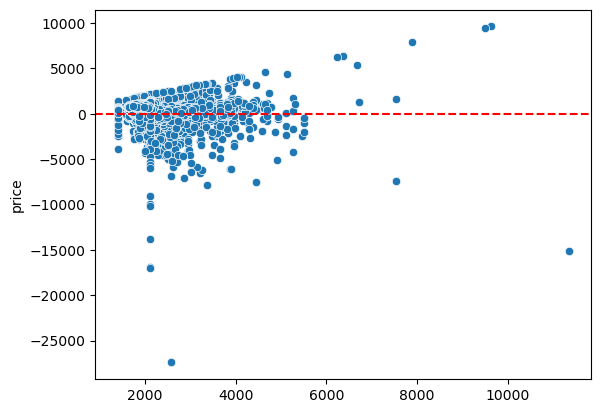

In [730]:
#5.6 Final Model: Visualizing Regression Results

# Using Seaborn to make scatter plot of regression plot.
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = slr_model.predict(X)
residuals = y_pred - y

sns.scatterplot(x=y_pred,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

### Comments for regression plot
From the regression plot, there is a heavy concentration of points close to zero on the y-axis. <br>
However, it appears that there are some outliers forming into a fan shape, which may indicate heteroscedasticity. <br>
A fan shape suggests that the variance of the residuals is increasing or decreasing as the predicted values increase. <br>
Heteroscedasticity means that the variance of the residuals is not constant. In other words, the spread of the residuals changes as the predicted values (or one of the features) increase. <br>
In a well-behaved model, you would expect the residuals to be spread equally across all levels of the predicted values (homoscedasticity). <br>

## Conclusion 
In conclusion, three models were tested: Simple Linear Regression, Polynomial Regression and Polynomial regression with Ridge L2 Regularization. <br>
**Of the three models, Simple Linear Regression had the best performance due to having the best metrics and was chosen to be the final model.** <br>
- Simple validation was used for all three models. The reason is so we could evaluate the metrics in a similar method before choosing final model.
- All three regression models required the data to be converted into numerical format hence the use of encoding. With the categorical data mainly being nominal, OneHotEncoder was used to convert categorical values to numerical values.
- With what was stated above, the final model (Simple Linear Regression) had the encoding feature (OneHotEncoder) applied to the data and hence why it was used as part of feature engineering.  
- Continuing with features, standard scaling was chosen in the final model as scaling as it was used due to the vast range of different numerical values for certain features (ex: sq_feet). <br>
- As per prediction experimentation above (#5.5 Final Model: Prediction), at "sq_feet" of 3000 and if the type is a 'House', the predicted price is $4296.2312.  

### End